Dataset loaded successfully with shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
2,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
3,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
4,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
5,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 1 to 649
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    object
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    object
 7   Fedu        649 non-null    object
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    object
 13  studytime   649 non-null    object
 14  failures    649 non-null    object
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649
unique,2,2,8,2,2,2,5,5,5,5,...,5,5,5,5,5,5,24,17,16,17
top,GP,"""F""",17,"""U""","""GT3""","""T""",2,2,"""other""","""other""",...,4,3,3,1,1,5,0,"""10""","""11""",11
freq,423,383,179,452,457,569,186,209,258,367,...,317,251,205,451,247,249,244,95,103,104


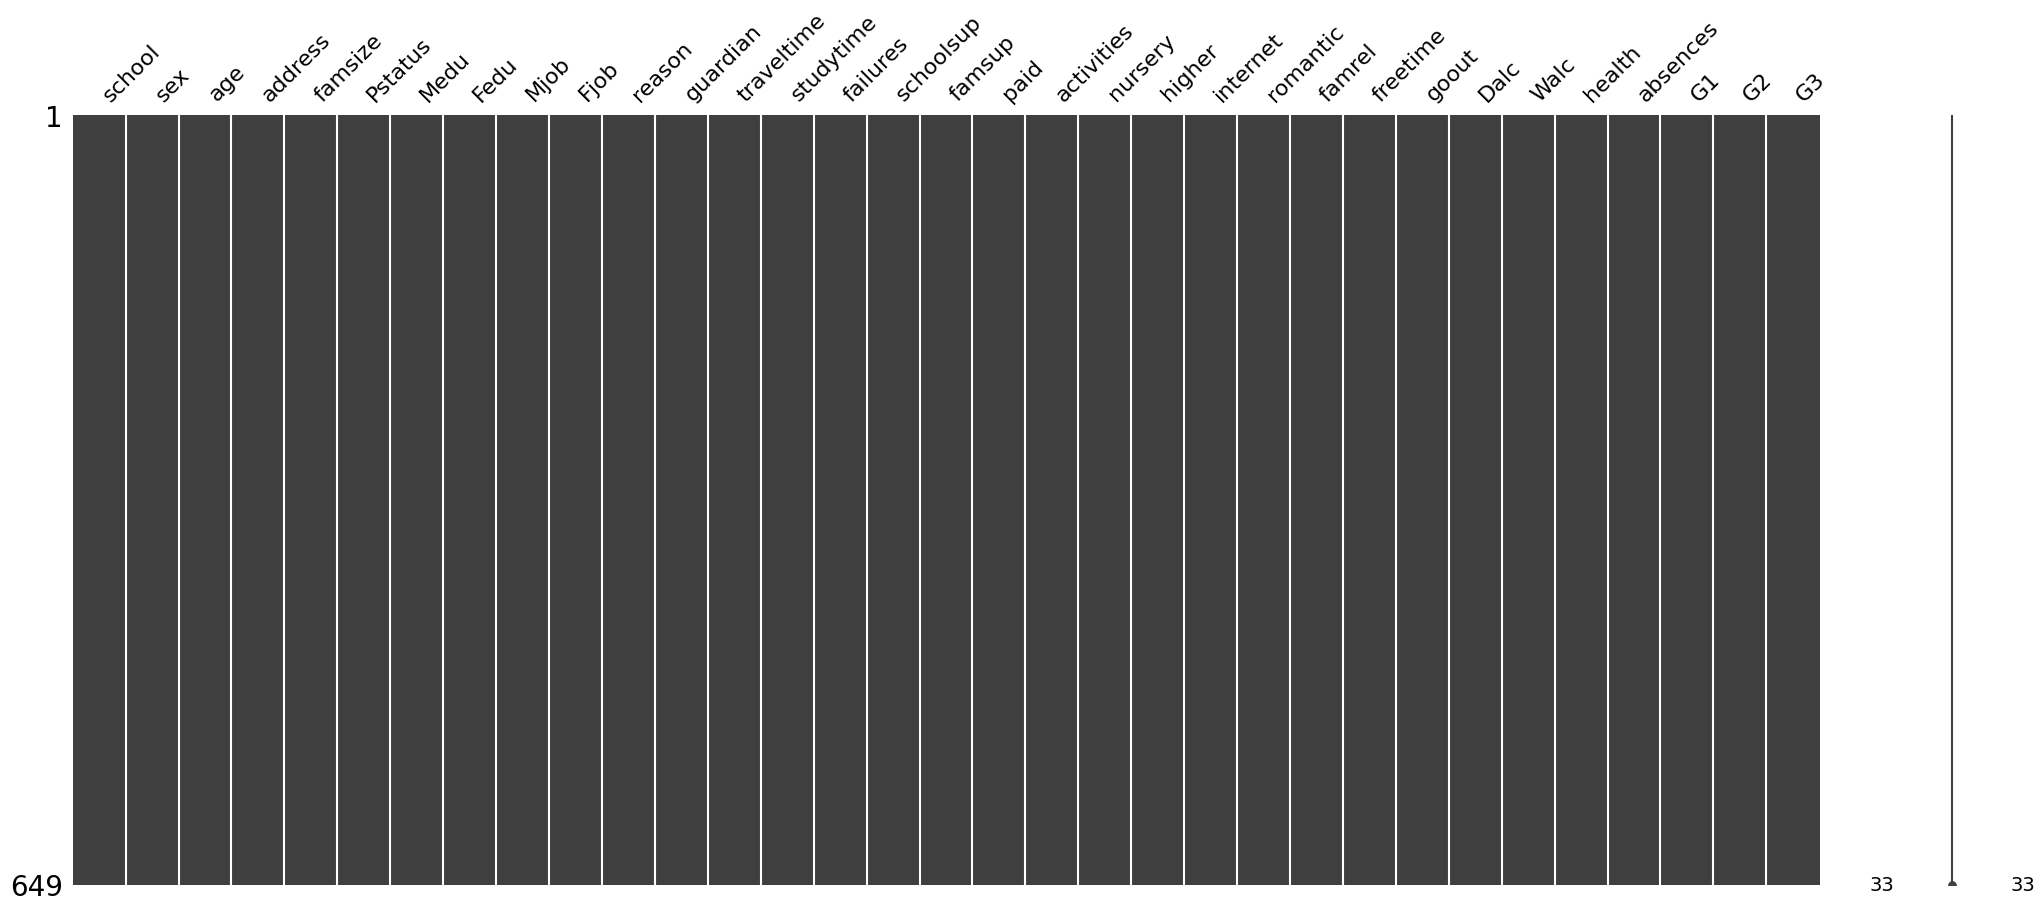

No numeric columns found for scaling.
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7688 - loss: 0.5376 - val_accuracy: 0.8454 - val_loss: 0.4332
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8498 - loss: 0.4112 - val_accuracy: 0.8454 - val_loss: 0.4231
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8310 - loss: 0.4069 - val_accuracy: 0.8454 - val_loss: 0.4113
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8609 - loss: 0.3525 - val_accuracy: 0.8454 - val_loss: 0.4072
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8505 - loss: 0.3561 - val_accuracy: 0.8454 - val_loss: 0.4064
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8613 - loss: 0.3293 - val_accuracy: 0.8351 - val_loss: 0.4073
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8925 - loss: 0.2525 - val_accuracy: 0.8351 - val_loss: 0.4125
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9065 - loss: 0.

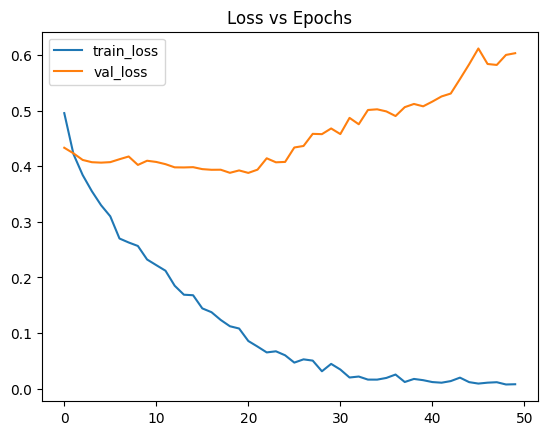

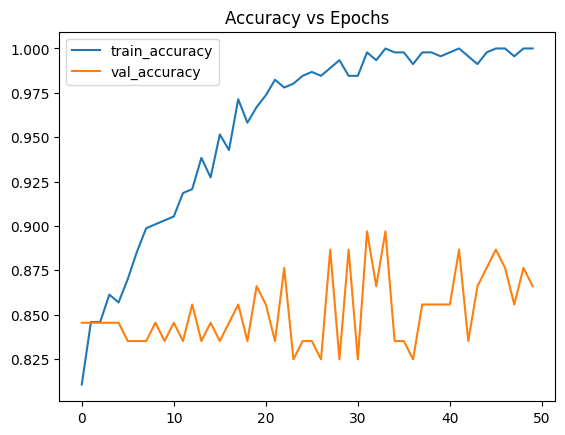

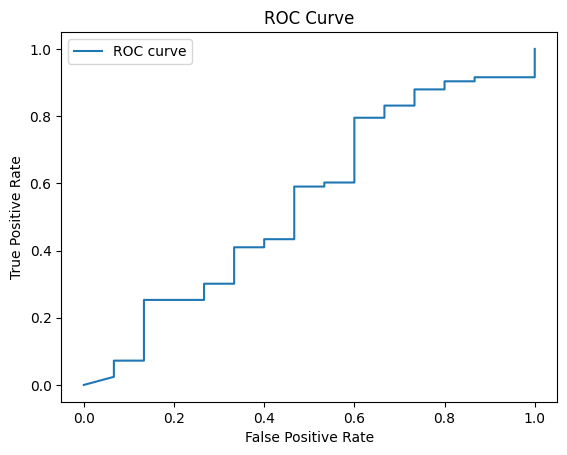

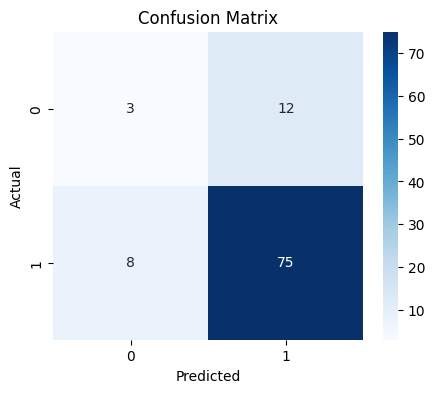

Model saved successfully!


In [46]:
# Student Performance Analysis and Prediction (Portuguese Dataset)

# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow import keras
from tensorflow.keras import layers

# Step 2: Load dataset
# Read the data as a single column string
df_single_col = pd.read_csv('student-por.csv', sep=';', header=None, dtype=str)

# Split the single column into multiple columns using comma as separator
df = df_single_col[0].str.split(',', expand=True)

# Use the first row as header and remove it from data
new_header = df.iloc[0]
df = df[1:].copy()
df.columns = new_header

print("Dataset loaded successfully with shape:", df.shape)
display(df.head())

# Step 3: Data understanding
print(df.info())
display(df.describe())
msno.matrix(df)
plt.show()

# Step 4: Convert G3 to numeric and create target variable
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')
df['pass'] = (df['G3'].fillna(0) >= 10).astype(int) # Fill NaN values in G3 with 0 before comparison

# Step 5: Feature preprocessing
X = df.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()


X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Convert all columns to numeric after one-hot encoding
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle potential NaN values created by coercion
X = X.fillna(0)

# Re-identify numeric columns after conversion
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Check if there are any numeric columns before scaling
if num_cols:
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])
else:
    print("No numeric columns found for scaling.")


y = df['pass']

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 6: Build the MLP model
input_dim = X_train.shape[1]
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Keep accuracy as metric

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Step 8: Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

# Step 9: Predictions & metrics
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Step 10: Visualization
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Step 11: Save model
model.save('student_performance_mlp.h5')
print("Model saved successfully!")

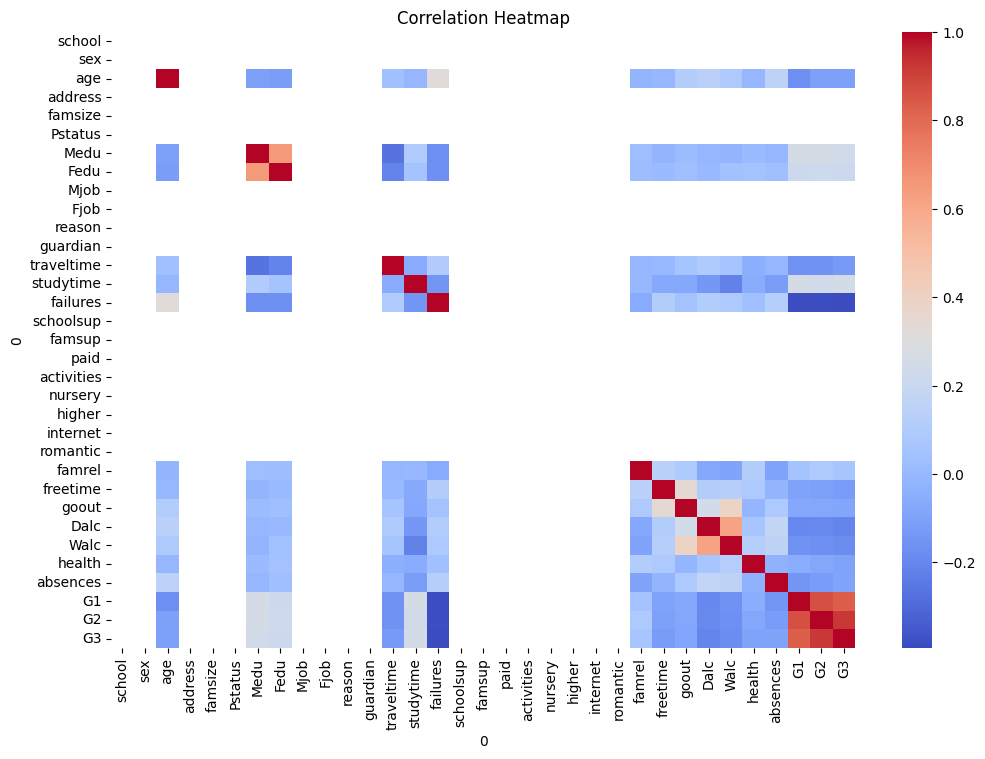

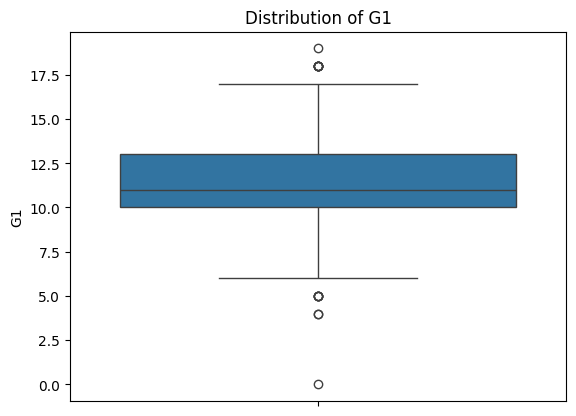

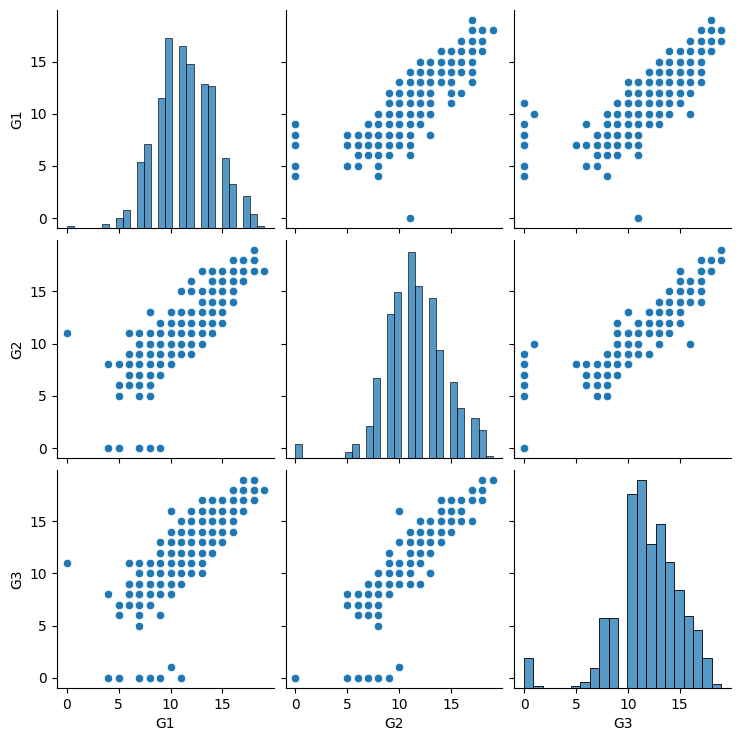

In [44]:
# Load dataset and preprocess (repeated from the previous cell to ensure data is available)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data as a single column string
df_single_col = pd.read_csv('student-por.csv', sep=';', header=None, dtype=str)

# Split the single column into multiple columns using comma as separator
df = df_single_col[0].str.split(',', expand=True)

# Use the first row as header and remove it from data
new_header = df.iloc[0]
df = df[1:].copy()
df.columns = new_header

# List of columns that should be numeric but might have quotes
numeric_cols_with_quotes = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Remove quotation marks from specified columns
for col in numeric_cols_with_quotes:
    if col in df.columns:
        df[col] = df[col].str.replace('"', '', regex=False)


# Convert all columns to numeric, coercing errors
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(y=df['G1'])
plt.title('Distribution of G1')
plt.show()

sns.pairplot(df[['G1', 'G2', 'G3']].dropna()) # Drop NaN to avoid errors in pairplot
plt.show()

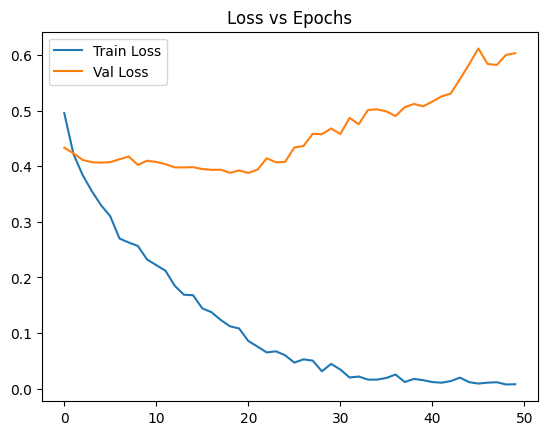

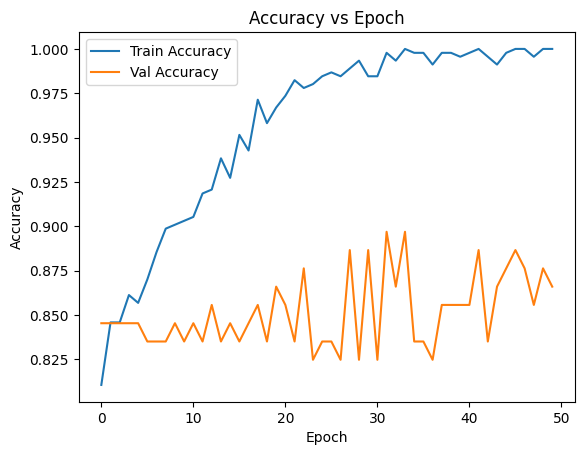

In [52]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


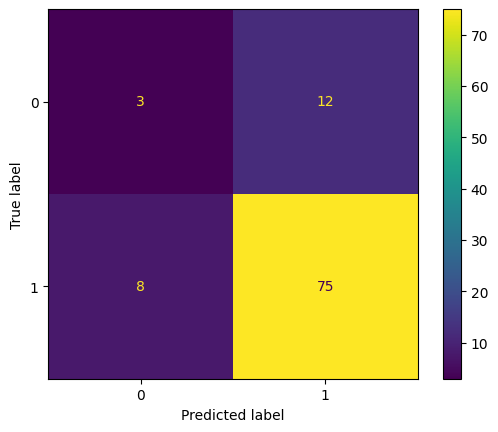

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test).ravel() # Get the predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int) # Convert probabilities to binary class labels
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

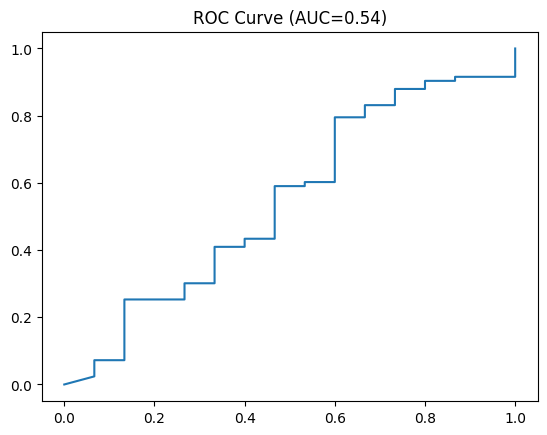

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title(f'ROC Curve (AUC={roc_auc:.2f})')
plt.show()
